# Neuronale Netze

## Aufgabe 1: Tensorflow Playground

Wir möchten uns mit dem Verhalten von neuronalen Netzen vertraut machen

1. Gehen Sie auf https://playground.tensorflow.org 
2. Machen Sie sich mit den Features vertraut
3. Was kodieren die Farben Blau und Orange?

Blau zeigt positive Werte und Orange negative Werte. Sowohl bei den Gewichten als im Output. 

4. Wie werden die Punkte klassifiziert?

Wie in der Vorlesung gezeigt wird bei binärer Klassifikation die Sigmoid Funktion verwendet und anschließend ein Tresholding (um auf -1 oder 1 zu runden)

5. Wie können Sie sehen welche Feature Importance das Modell errechnet hat?

Die Größe der Gewichte entspricht der dicke der Linien im Modell, um so größer (im Absolutbetrag) diese sind um so wichtiger erachtet das Modell diese.

6. Welche der gezeigten Feature Engineering Methoden kennen Sie bereits?

Implementiert haben wir bereits die Polynomiellen Features $X_1^2$, $X_2^2$, $X_1 X_2$. $sin(X_1), sin(X_2)$ haben wir nicht explizit gesehen. Dieses ist hilfreich, wenn die Daten spiralförmig angeordnet sind.

7. Versuchen Sie verschiedene Parameter auf verschiedenen Datensätzen und beobachten Sie die Modelle um ein Gefühl für das Verhalten zu bekommen.

    - Generell gilt: mehr Layer und Neuronen sorgen für flexiblere Modelle, aber das Training dauert lang. Regularisierung ist bei vielen Layern und Neuronen wichtig. Die Learning Rate kann zu hoch eingestellt sein, dass konvergiert das Modell nicht. Wenn die LR zu gering ist konvergiert das Modell nur sehr langsam. 

    - Man kann den Variance / Bias Tradeoff für viele Parameter gut sehen. 

    - Das Training mit ReLU ist schneller als mit z.B. tanh.

8. Deep Learning. Wenn Sie die Anzahl der Hidden Layer stark erhöhen spricht man von _Deep Learning_. Probieren Sie aus ob Sie mit Deep Learning und nur den Features $X_1$ und $X_2$ die spiralförmigen Datensätze separieren können.

Die vielen Layer sorgen dafür, dass das Modell deutlich flexibler wird und somit auch Sinus und Kosinus approximiert werden kann. Deep Learning ist sehr mächtig, neight aber auch wie die Random Forests zu overfitting. Zudem kommen Schwierigkeiten beim Training der Modelle (vanishing / exploding Gradients, sehr große Modelle die nur langsam Trainieren) und noch vieles mehr. Die meisten Probleme sind heutzutage aber lösbar und haben Mitigationsstrategien.

# Aufgabe 2: MNIST

MNIST steht für Modified National Institute of Standards and Technology database und enthält Bilder von Zahlen die von Handschriften stammen. Diese mit neuronalen Netzen zu erkennen gilt als das "Hello World" von Bilderkennung mit Machine Learning.

1. Laden Sie die Daten und analysieren Sie diese (datentyp, plotting etc)
2. Machen Sie einen Test/Traning Split der Daten
3. Bauen Sie eine Pipeline mit dem `MLPClassifier`
4. Sehen Sie wie gut Sie abschneiden mit verschiedenen Netztopologien und messen Sie diese mit `classification_report`. 

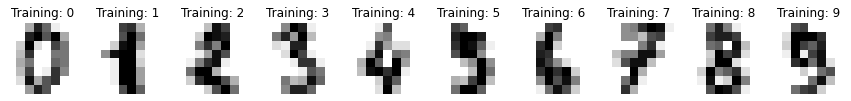

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mnist = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 6))
for ax, image, label in zip(axes, mnist.images, mnist.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
n = len(mnist.images)
X = mnist.images.reshape((n, -1))  # flatten
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = MLPClassifier(random_state=0, verbose=1, max_iter=500)
pipe = Pipeline([("scaler", MinMaxScaler()), ("NN", clf)])
pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

print(metrics.classification_report(y_test, predicted, digits=4))

Iteration 1, loss = 2.35440553
Iteration 2, loss = 2.17697845
Iteration 3, loss = 2.04117365
Iteration 4, loss = 1.90047396
Iteration 5, loss = 1.75166604
Iteration 6, loss = 1.59886472
Iteration 7, loss = 1.44556700
Iteration 8, loss = 1.29561413
Iteration 9, loss = 1.15577595
Iteration 10, loss = 1.02611357
Iteration 11, loss = 0.91099858
Iteration 12, loss = 0.81004864
Iteration 13, loss = 0.72169088
Iteration 14, loss = 0.64615093
Iteration 15, loss = 0.58303937
Iteration 16, loss = 0.52876332
Iteration 17, loss = 0.48176306
Iteration 18, loss = 0.44342281
Iteration 19, loss = 0.40824235
Iteration 20, loss = 0.37977207
Iteration 21, loss = 0.35416936
Iteration 22, loss = 0.33244997
Iteration 23, loss = 0.31247170
Iteration 24, loss = 0.29597516
Iteration 25, loss = 0.28036585
Iteration 26, loss = 0.26618063
Iteration 27, loss = 0.25355858
Iteration 28, loss = 0.24221749
Iteration 29, loss = 0.23172193
Iteration 30, loss = 0.22186976
Iteration 31, loss = 0.21370216
Iteration 32, los

Iteration 253, loss = 0.00727698
Iteration 254, loss = 0.00725693
Iteration 255, loss = 0.00718563
Iteration 256, loss = 0.00709699
Iteration 257, loss = 0.00706214
Iteration 258, loss = 0.00700905
Iteration 259, loss = 0.00696905
Iteration 260, loss = 0.00688903
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        55
           1     0.9286    0.9811    0.9541        53
           2     1.0000    1.0000    1.0000        42
           3     1.0000    1.0000    1.0000        44
           4     1.0000    1.0000    1.0000        37
           5     0.9535    0.9318    0.9425        44
           6     1.0000    1.0000    1.0000        42
           7     0.9535    1.0000    0.9762        41
           8     0.9091    0.9302    0.9195        43
           9     0.9773    0.8776    0.9247        49

    accuracy                         0.9711       

In [10]:
clf_deep = MLPClassifier(
    random_state=0, max_iter=500, hidden_layer_sizes=(100, 100, 100)
)

pipe_deep = Pipeline([("scaler", MinMaxScaler()), ("NN", clf_deep)])
pipe_deep.fit(X_train, y_train)

predicted_deep = pipe_deep.predict(X_test)

print(metrics.classification_report(y_test, predicted_deep, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        55
           1     0.9623    0.9623    0.9623        53
           2     1.0000    1.0000    1.0000        42
           3     0.9778    1.0000    0.9888        44
           4     0.9487    1.0000    0.9737        37
           5     0.9318    0.9318    0.9318        44
           6     1.0000    1.0000    1.0000        42
           7     0.9535    1.0000    0.9762        41
           8     0.9070    0.9070    0.9070        43
           9     0.9773    0.8776    0.9247        49

    accuracy                         0.9667       450
   macro avg     0.9658    0.9679    0.9664       450
weighted avg     0.9669    0.9667    0.9664       450

